
# Bikes Case Study

### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bikes dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries necassary
import numpy as np
import pandas as pd
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

from IPython.display import Markdown, display

    
%matplotlib inline

In [3]:
#define a print function to show markdowns
def printmd(string):
    '''
    purpose: print string as markdown 
    
    string: string to display
     return nothing
    '''

    display(Markdown(string))

In [4]:
#define variables so that we can change them in one place if needed
TitleFontSize=24
XFontSize=15
YFontSize=15

In [5]:
# read the main dataset
bikes = pd.read_csv("day.csv")

In [6]:
# Check the head of the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bikes dataframe

In [7]:
#look at the size of the data
bikes.shape

(730, 16)

In [8]:
#create a variable cnt so we don't  need to use string literal everywhere
cnt='cnt'

In [9]:
#view the data types
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
#describe the data
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### From the Dataset characteristics we can see following fields are not directly impacting our target variable cnt and we can drop them
- instant: record index
- dteday : date (yr,month,holiday,weekday,workingday is alraedy extracted)
- casual: count of casual users
- registered: count of registered users

In [11]:
# drop variables identified in the analysis above and view the data
bikes=bikes.drop(['instant','dteday','casual','registered'],axis=1)
bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


## Mappings
Define the mappings of categorial variables, so that they are easier to understand

In [12]:


# maped the season column according to descripttions
#(1:spring, 2:summer, 3:fall, 4:winter)
bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# maped the weekday column according to descriptin
bikes['weekday'] = bikes['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})


# maped mnth column values (1 to 12 ) as (jan to dec) respectively
bikes['mnth'] = bikes['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
                             11: 'November', 12:'December'})
# weathersit :
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
#  maped weathersit column
bikes['weathersit'] = bikes['weathersit'].map({1: 'ClearFewClouds', 2: 'MistCloudy', 3: 'LightSnowLightRain', 4: 'HeavyRainIcePallets'})

In [13]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Change the type to category


In [14]:
## Mappings
# Define the mappings of categorial variables, so that they are easier to understand# identify categorical variables and change them to cateogry instead of object to save memroy
Cats = ['season','mnth','holiday','weekday','weathersit']

bikes[Cats] = bikes[Cats].astype('category')

In [15]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 44.8 KB


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

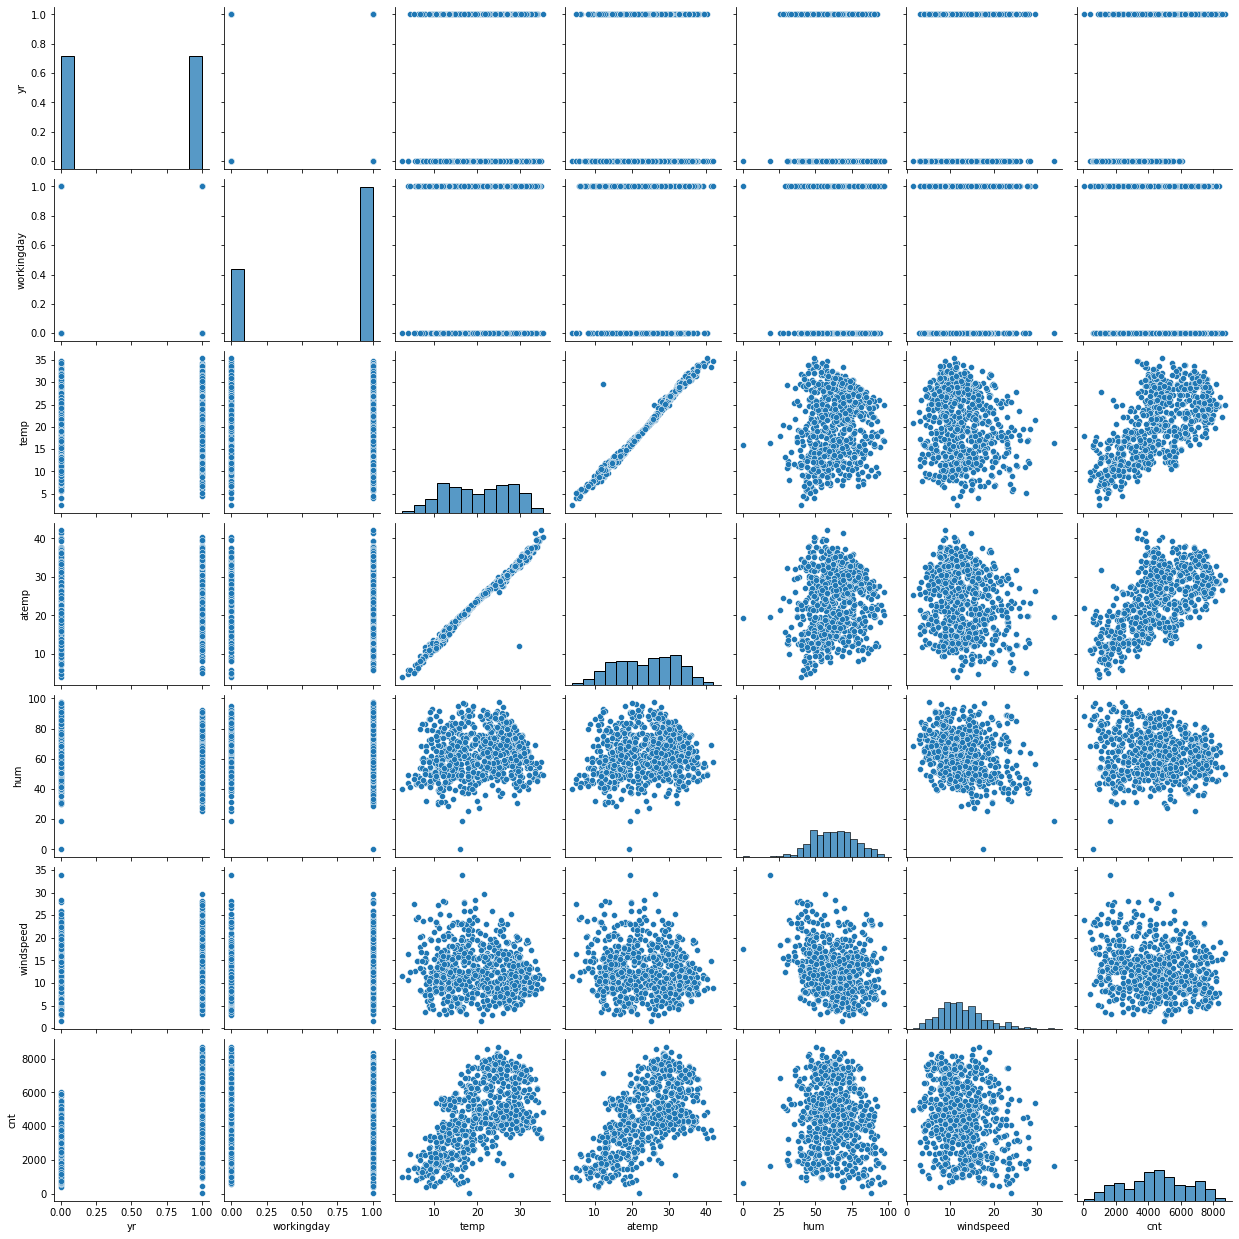

In [16]:
sns.pairplot(bikes)
plt.show()

# Correlation

<AxesSubplot:>

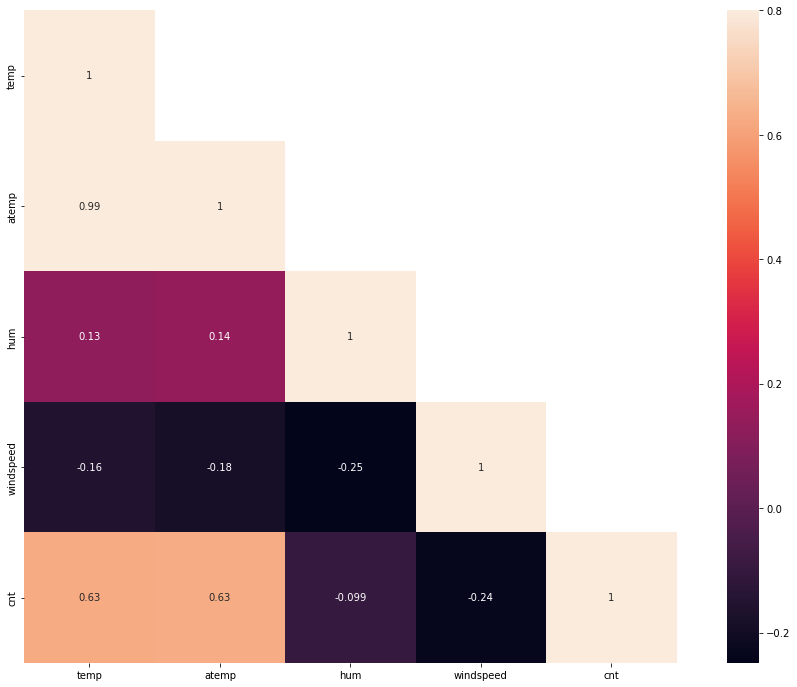

In [17]:

corrColumns = bikes[["temp","atemp","hum","windspeed","cnt"]].corr()
aCorr = np.array(corrColumns)
aCorr[np.tril_indices_from(aCorr)] = False
fig,ax= plt.subplots()
fig.set_size_inches(18,12)
sns.heatmap(corrColumns, mask=aCorr,vmax=.8, square=True,annot=True)

**Insight**:
    
    From above we an see that both temp and atemp highly correlated with cnt and windspeed,hum are negatively correlated
    

In [18]:
#Let's inspect temp and atemp
bikes[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


**Insight**: 

from above we can see that temp and atemp are highly correlated with each other 
and we can delete atemp as it is generelly a derived variable of temp


In [19]:
# drop the atemp variable
bikes=bikes.drop(['atemp'],axis=1)


## Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [20]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

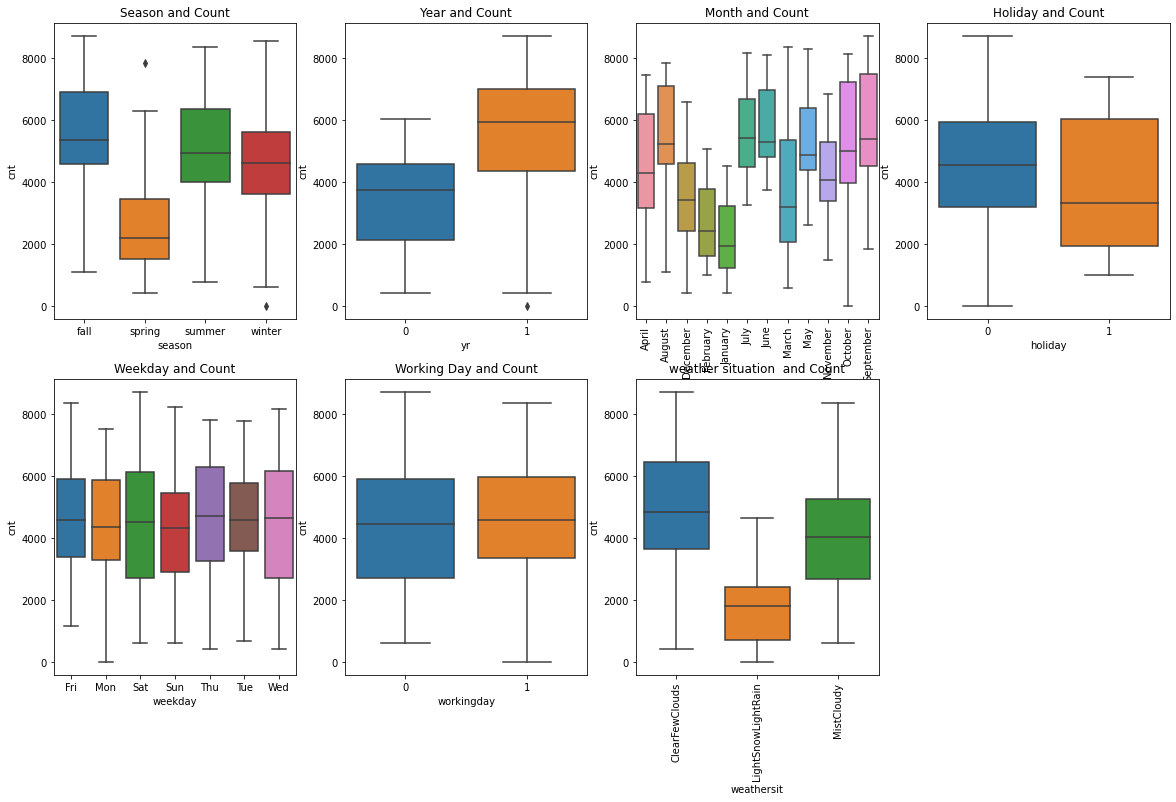

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = cnt, data = bikes).set(title='Season and Count')
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = cnt, data = bikes).set(title='Year and Count')
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = cnt, data = bikes).set(title='Month and Count')
plt.xticks(rotation=90)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = cnt, data = bikes).set(title='Holiday and Count')
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = cnt, data = bikes).set(title='Weekday and Count')
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = cnt, data = bikes).set(title='Working Day and Count')

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = cnt, data = bikes).set(title='weather situation  and Count')
plt.xticks(rotation=90)


plt.show()

# Observations
## yr (year)
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively and from the box plot (cnt,yr) you can clearly see that yr=1 (2019) is way higher than yr=0(2018). 25% of yr=1 touching 75% of yr=0

## month
box for month=1(january) is very low and of 9(september) is way higher then many others
## season
season 1 is way lower then all other seasons while season 3 is on top
## workingday
seems like there is no significant difference betweek a working day and a non working day
## holiday
a non holiday 25% is very close to 50% of holiday though 75% is almost same which shows

## weekday 
median is consistent. On weeday=4(thursday) 75% is a little higher


We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `workingday` with `mnth` as the hue and see if there is any difference

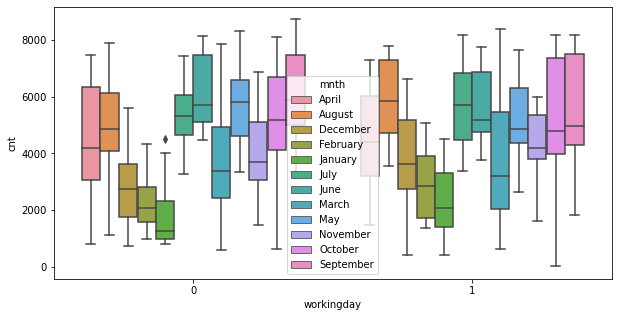

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = cnt, hue = 'mnth', data = bikes)
plt.show()

**insights:**
    
From abvoe diagram we can see that most of the cnts are high in yr=1

## Step 3: Data Preparation

### Dummy Variables

- You can see that the dataset has many columns such as season,month,holiday,workingday,weekday,weathersit which are numeric but in reality they are categorial varibles. For example we cannot sum month 8 to month 6 and come up with some meaningful month (14)
***Note:** since yr is already one variable with two values we will keep it as is  
- We need to create dummy variables for these columns

In [23]:


varlist =  ['season',  'mnth',  'weekday','weathersit']
# Let's drop the first column from status df using 'drop_first = True' as the first column 
# can be calculated rest of the variables are all 0

for var in varlist:
    #create the dummy variable usign pd.get_dummies(bikes[var], drop_first = True)
    # Add the results to the original bikes dataframe using pd.concat

    bikes = pd.concat([bikes,  
                       pd.get_dummies(bikes[var],prefix=var, drop_first = True)], 
                      axis = 1
                     )
# please note that the drop first = True will drop the first generated dummy column,
#which is redundent and can be induces by other variables
#Suppose we have two values in columns yr 0 and 1. 
#When we create dummy variables it will create two variables say yr_0, yr_1; 
#we can drop the first variable (yr_0) as a second variable (yr_1) 
#can hold both values such as when 1 then yr=1 otherwise yr=0. 


In [24]:
#Let's review the generated dummies variables
bikes.T.reset_index()['index']

0                            season
1                                yr
2                              mnth
3                           holiday
4                           weekday
5                        workingday
6                        weathersit
7                              temp
8                               hum
9                         windspeed
10                              cnt
11                    season_spring
12                    season_summer
13                    season_winter
14                      mnth_August
15                    mnth_December
16                    mnth_February
17                     mnth_January
18                        mnth_July
19                        mnth_June
20                       mnth_March
21                         mnth_May
22                    mnth_November
23                     mnth_October
24                   mnth_September
25                      weekday_Mon
26                      weekday_Sat
27                      week

In [25]:
#since we have created dummies variables we do not need origional variables 
# and we can drop the origional columns
bikes.drop(varlist,axis=1,inplace=True)
bikes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   yr                             730 non-null    int64   
 1   holiday                        730 non-null    category
 2   workingday                     730 non-null    int64   
 3   temp                           730 non-null    float64 
 4   hum                            730 non-null    float64 
 5   windspeed                      730 non-null    float64 
 6   cnt                            730 non-null    int64   
 7   season_spring                  730 non-null    uint8   
 8   season_summer                  730 non-null    uint8   
 9   season_winter                  730 non-null    uint8   
 10  mnth_August                    730 non-null    uint8   
 11  mnth_December                  730 non-null    uint8   
 12  mnth_February                  730 n

In [26]:
#since the type of yr is int64 change it to uint8 save some space
bikes['yr']=bikes['yr'].astype('uint8')


### Rescaling the Features 

Here we can see that all the columns except ['atemp', 'hum', 'windspeed','cnt'] has  all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So we will use minmax technique to rescale those features which will translate each feature to a value between 0 and 1.

In [27]:
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed',cnt]

bikes[num_vars] = scaler.fit_transform(bikes[num_vars])

In [29]:
bikes[num_vars].describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,0.543852,0.645400,0.346568,0.516108
std,0.228140,0.146402,0.159873,0.222735
min,0.000000,0.000000,0.000000,0.000000
25%,0.346084,0.534704,0.232045,0.362143
50%,0.548307,0.643959,0.326928,0.520766
75%,0.743261,0.750535,0.434629,0.683847
max,1.000000,1.000000,1.000000,1.000000


**Inight:**

From the above table we can see that all the transformed or scalled values has min=0 and max=1

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [30]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)



In [31]:
#let's describe the data
df_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnowLightRain,weathersit_MistCloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537262,0.648976,0.348651,0.513620,0.243137,0.245098,0.24902,0.096078,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.468282,0.225844,0.145569,0.162827,0.224593,0.429398,0.430568,0.43287,0.294988,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.041051,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.537489,0.232053,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.652314,0.325631,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.753214,0.438484,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.997858,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

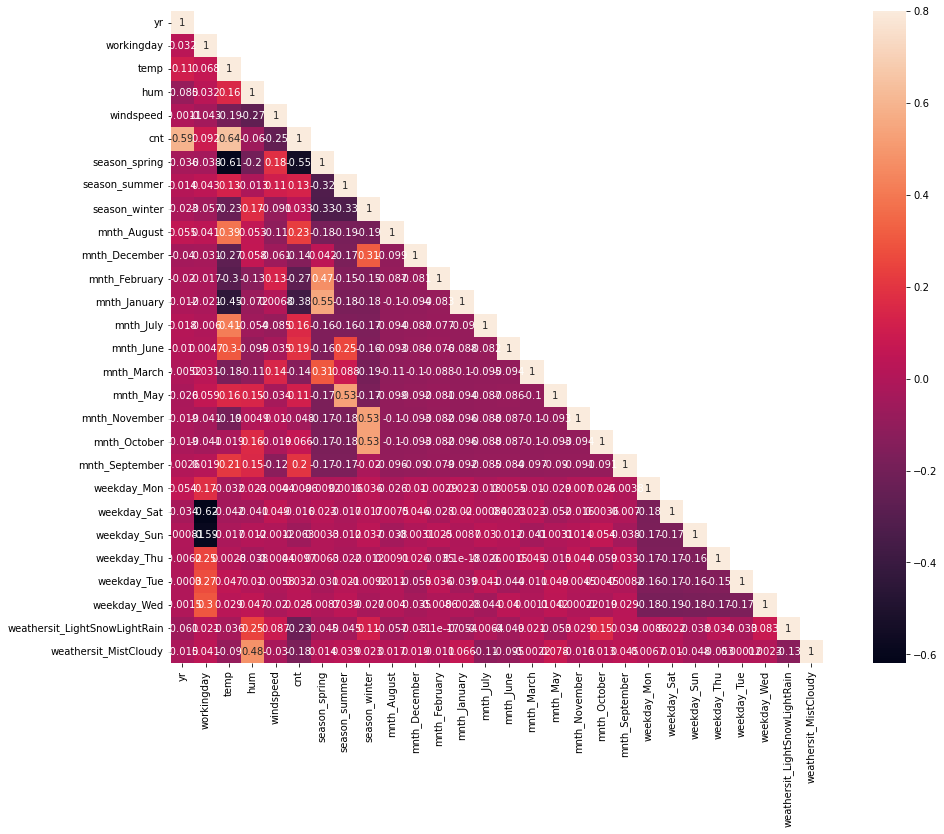

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated


corrColumns = df_train.corr()
aCorr = np.array(corrColumns)
aCorr[np.tril_indices_from(aCorr)] = False
fig,ax= plt.subplots()
fig.set_size_inches(18,12)
sns.heatmap(corrColumns, mask=aCorr,vmax=.8, square=True,annot=True)


## View correlation in table
From the above diagram it is very difficult to understand the correlations between all features due to high number of columns, so let's inspect the correlation between cnt only

In [33]:
df_train.corr()[cnt].sort_values(ascending=False).reset_index()

,index,cnt
0,cnt,1.000000
1,temp,0.643517
2,yr,0.591508
3,mnth_August,0.227229
4,mnth_September,0.201327
5,mnth_June,0.187821
6,mnth_July,0.157812
7,season_summer,0.134343
8,mnth_May,0.113027
9,workingday,0.092320


**Insights:**
    
From the list above we can see there is high +ve correlation between cnt and temp, yr, mnth_August,mnth_September and we also see -tive corrleations with season_spring,mnth_January, and mnth_February


## Validate correlation between temp and cnt

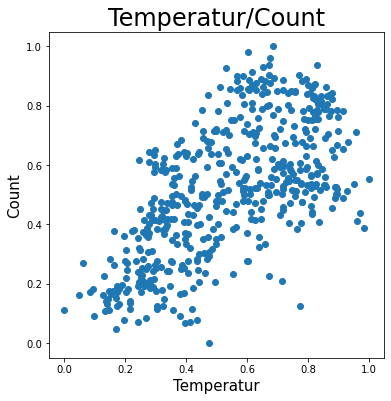

In [34]:
#validate temp and cnt are actually correlated
plt.figure(figsize=[6,6])
plt.scatter(df_train['temp'], df_train[cnt])
plt.title('Temperatur/Count',fontsize=TitleFontSize)
plt.xlabel('Temperatur',fontsize=XFontSize)
plt.ylabel('Count',fontsize=YFontSize)
plt.show()


### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop(cnt)
X_train = df_train


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### Recursive feature elimination (RFE)
We will use Recursive feature elimination (RFE) as there are high number of variables involved and manual process will take a lot of effort to build

In [36]:
#Create Linear Regresion Model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
#compine support and ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_August', False, 3),
 ('mnth_December', False, 2),
 ('mnth_February', False, 3),
 ('mnth_January', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 3),
 ('mnth_March', False, 3),
 ('mnth_May', False, 3),
 ('mnth_November', False, 2),
 ('mnth_October', False, 3),
 ('mnth_September', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 3),
 ('weekday_Tue', False, 3),
 ('weekday_Wed', False, 3),
 ('weathersit_LightSnowLightRain', True, 1),
 ('weathersit_MistCloudy', True, 1)]

In [38]:
#  keep the columns with rfe.support_ = True
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_July', 'mnth_September',
       'weekday_Sat', 'weekday_Sun', 'weathersit_LightSnowLightRain',
       'weathersit_MistCloudy'],
      dtype='object')

In [39]:
# view all other variables
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_October', 'weekday_Mon', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

### Create re-usable functions

In [40]:
# Adding a constant variable 
# Importing RFE and LinearRegression
def GenLMandVIF (df):
    '''
    input df - dataframe
    output lm -linear model
    output vif 
    This procedure is responsible for  calculating the linear model and VIF
    '''
    if 'const' in df.columns:
        df.drop(['const'], axis = 1,inplace=True)

    df = sm.add_constant(df)
    lm = sm.OLS(y_train,df).fit()   # Running the linear model
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return lm,vif

In [41]:
def DropColumnAndPrintSummary(df,column=None):
    '''
    input df - dataframe
    input column - column to be dropped

    output lm -linear model
    output vif 
    This procedure is responsible will drop the column if supplied and call  GenLMandVIF
    it will then print lm.summary and vif
    '''
        
    if column!=None:
         df.drop([column], axis = 1,inplace=True)

    lm,vif=GenLMandVIF(df)
    print(lm.summary())
    print(vif)
    return lm,vif

In [42]:
X_train_rfe = X_train[col]

In [43]:
DropColumnAndPrintSummary(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          3.81e-190
Time:                        13:53:56   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fa1695691c0>,
                          Features   VIF
 2                         holiday   inf
 3                      workingday   inf
 11                    weekday_Sat   inf
 12                    weekday_Sun   inf
 4                            temp  2.99
 7                   season_spring  2.55
 5                             hum  1.89
 8                   season_winter  1.78
 14          weathersit_MistCloudy  1.57
 9                       mnth_July  1.30
 13  weathersit_LightSnowLightRain  1.25
 6                       windspeed  1.17
 10                 mnth_September  1.11
 1                              yr  1.03
 0                           const  0.00)

**Insights:**

From the analysis above we can see that `holiday` has high p-value `0.732` and vif value of `inf (infinity)` so let's drop it re run the model

In [44]:
#drop the column holiday and run the model again
lm,vif=DropColumnAndPrintSummary(X_train_rfe,'holiday') 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          3.81e-190
Time:                        13:53:56   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Insights:**

From the analysis above we can see that `weekday_Sun` has high p-value `0.027` and vif value of `5.74` so let's drop it re run the model

In [45]:
#drop the column and run the model again
lm,vif=DropColumnAndPrintSummary(X_train_rfe,'weekday_Sun')


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          2.88e-190
Time:                        13:53:56   Log-Likelihood:                 508.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     497   BIC:                            -936.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Insights:**

From the analysis above we can see that all of the p-values are close to 0 and vif values are less than 5 which shows the model is good

## Multicolinarity
Since all the VIF values are less than 5 which shows there is no Multicolinarity between the features of the model

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [46]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
printmd(f'**Final Variables:**')
printmd(f'{var_final}')
# Print the coefficents of final varible
printmd(f'**Coefficents:**')
print(round(lm_final.params,3))

**Final Variables:**

['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_July', 'mnth_September', 'weekday_Sat', 'weathersit_LightSnowLightRain', 'weathersit_MistCloudy']

**Coefficents:**

const                            0.291
yr                               0.231
workingday                       0.052
temp                             0.479
hum                             -0.145
windspeed                       -0.176
season_spring                   -0.108
season_winter                    0.057
mnth_July                       -0.077
mnth_September                   0.057
weekday_Sat                      0.062
weathersit_LightSnowLightRain   -0.250
weathersit_MistCloudy           -0.059
dtype: float64


## Model Evaluation on train set

In [47]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)

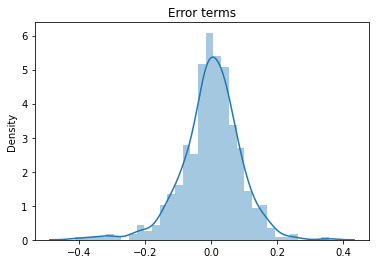

In [48]:
# distrubition plot for residuals
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

**Insights:**
- The distribution plot of error term shows the normal distribution with mean at Zero.

## Homoscedasticity

Text(0, 0.5, 'Residual')

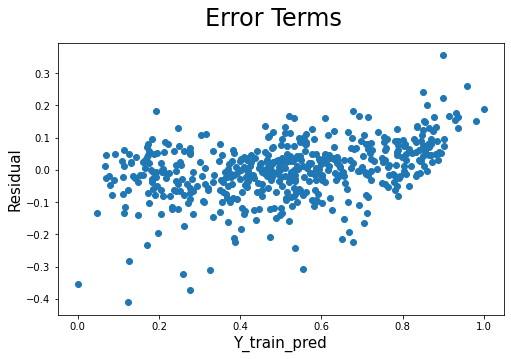

In [49]:
# Error terms train set
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)

fig.suptitle('Error Terms', fontsize=TitleFontSize)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=XFontSize)                      # X-label
plt.ylabel('Residual', fontsize=YFontSize)   

**Insights:**
- It seems like the corresponding residual plot is reasonably random. 
- Also the error terms satisfy to have reasonably constant variance (homoscedasticity) 

## Prediction on test set

In [50]:
df_test.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnowLightRain,weathersit_MistCloudy
184,0,1,0,0.831783,0.655956,0.121812,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.608826,0.188468,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.835904,0.361537,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.436161,0.366681,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.313625,0.556403,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [51]:
# split the data
y_test = df_test.pop('cnt')
X_test = df_test

X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnowLightRain,weathersit_MistCloudy
184,0,1,0,0.831783,0.655956,0.121812,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.608826,0.188468,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.835904,0.361537,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.436161,0.366681,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.313625,0.556403,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
# select final variables from X_test
X_test_sm = df_test[var_final]
X_test_sm.T

,184,535,299,221,152,404,198,171,512,200,...,615,58,646,287,641,400,702,127,640,72
yr,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
workingday,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
temp,0.831783,0.901354,0.511964,0.881625,0.817246,0.256524,0.856704,0.774672,0.814131,0.883701,...,0.747675,0.433803,0.482890,0.557653,0.745598,0.257562,0.519232,0.584649,0.745598,0.331557
hum,0.655956,0.608826,0.835904,0.436161,0.313625,0.577977,0.669666,0.792203,0.695373,0.727078,...,0.821766,0.901146,0.783205,0.497001,0.743359,0.707370,0.754499,0.649529,0.816195,0.511010
windspeed,0.121812,0.188468,0.361537,0.366681,0.556403,0.353856,0.398730,0.306415,0.358977,0.188478,...,0.533349,0.551041,0.346152,0.485890,0.196166,0.316663,0.312814,0.107707,0.091026,0.236118
season_spring,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
season_winter,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
mnth_July,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mnth_September,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
weekday_Sat,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
y_test_pred = lm_final.predict(X_test_sm)
X_test_sm.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_July,mnth_September,weekday_Sat,weathersit_LightSnowLightRain,weathersit_MistCloudy
184,1.0,0,0,0.831783,0.655956,0.121812,0,0,1,0,0,0,1
535,1.0,1,1,0.901354,0.608826,0.188468,0,0,0,0,0,0,0
299,1.0,0,1,0.511964,0.835904,0.361537,0,1,0,0,0,0,1
221,1.0,0,1,0.881625,0.436161,0.366681,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.313625,0.556403,0,0,0,0,0,0,0


## Evaluate the model on test set

### Calculate and Print R2

In [54]:
# Get R-Squared fro test dataset

r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
printmd(f'**R-Squared for the test dataset:** { round(r2_test,3)}')

**R-Squared for the test dataset:** 0.82

### Calculate and print Adjusted R2

In [55]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
printmd(f'**Adj. R-Squared for Test dataset:**  {round(r2_test_adj,3)}')

**Adj. R-Squared for Test dataset:**  0.81

### Calculate and print mean Squared Error

In [56]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
printmd(f'**Mean Squared Error :** {round(mse,4)}')

**Mean Squared Error :** 0.0085

### Error Terms (Residulas)

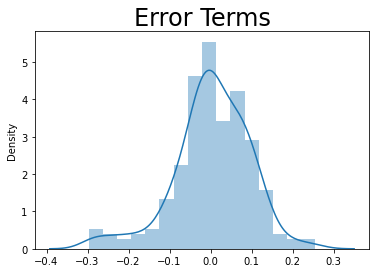

In [57]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=TitleFontSize)
sns.distplot(res_test)
plt.show()

**Insight:**
The distribution plot of error term shows the normal distribution with mean at Zero.

Text(0.5, 0, 'Y test predicted')

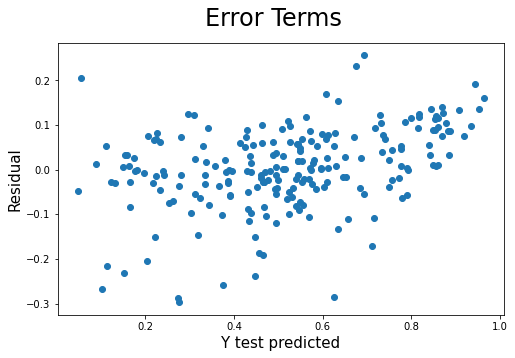

In [58]:
# Error terms
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)

fig.suptitle('Error Terms', fontsize=TitleFontSize)  
plt.ylabel('Residual', fontsize=XFontSize)   
plt.xlabel('Y test predicted', fontsize=YFontSize)                      


**Insight:** It seems like the corresponding residual plot is reasonably random.

Text(0, 0.5, 'y_test_pred')

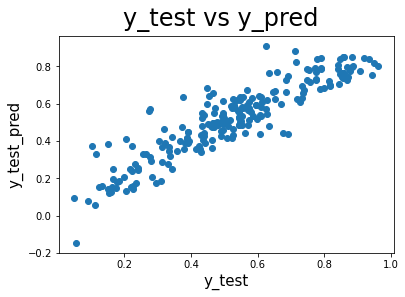

In [59]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = TitleFontSize)               
plt.xlabel('y_test', fontsize = XFontSize)                          
plt.ylabel('y_test_pred', fontsize = YFontSize)      

**Insights:**
- We can colude that the model `lm` fit isn't by chance, and has descent predictive power.

## Conclusions

In [60]:
# Print R Squared and adj. R Squared
printmd(f'**R- Sqaured train:** {round(lm_final.rsquared,2)} **Adj. R-Squared train:** {round(lm_final.rsquared_adj,3)}' )
printmd(f'**R- Sqaured test :** {round(r2_test,2)}  **Adj. R-Squared test :** {round(r2_test_adj,3)}')

# Print the coefficents of final varible
printmd("**Variable's Coefficents :**")
print(round(lm_final.params,3))

**R- Sqaured train:** 0.84 **Adj. R-Squared train:** 0.838

**R- Sqaured test :** 0.82  **Adj. R-Squared test :** 0.81

**Variable's Coefficents :**

const                            0.291
yr                               0.231
workingday                       0.052
temp                             0.479
hum                             -0.145
windspeed                       -0.176
season_spring                   -0.108
season_winter                    0.057
mnth_July                       -0.077
mnth_September                   0.057
weekday_Sat                      0.062
weathersit_LightSnowLightRain   -0.250
weathersit_MistCloudy           -0.059
dtype: float64


The equation of our best fitted line is:

$ cnt =0.291 + (0.231  \times  yr) + (0.052  \times  workingday) + (0.479 \times temp) - (0.145 \times Humidity) - (0.176 \times windspeed) - (0.108 \times season\_spring) + (0.057 \times season\_winter) - (0.077 \times mnth\_July) + (0.057 \times mnth\_September) +  (0.062 \times weekday\_Sat) - (0.250 \times weathersit\_LightSnowLightRain) - (0.059 \times weathersit\_MistCloudy)$

# Insights

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:
    1. Temperature (0.479)
    2. weathersit : LightSnowLightRain+MistCloudy (-0.309)
    3. year (0.231)


- **So it recomended to give these variables utmost importance while planning to achieve maximum demand.**

In [61]:
print ('Thanks!')

Thanks!
